Part 1 concerns data preprocessing and thereby tests one's ability to deal with many different methods offereby by pandas.

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Q1-1. califonia housing. 
# Excluding rows which contain missing values, extract 70% of data from the first 
# and print Q1 of the variable 'housing_median_age'
house = pd.read_csv('data/housing.csv')
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
# drop missing values
house_wo_mv = house.dropna()
house_wo_mv.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
len(house_wo_mv)*0.7

14303.099999999999

In [7]:
# extract 70% of data from the first
house70 = house_wo_mv.iloc[:int(len(house_wo_mv)*0.7),:]
print(len(house70))

14303


In [8]:
# print Q1 of the variable 'housing_median_age'
house70['housing_median_age'].quantile(0.25)

19.0

In [9]:
# Q1-2 Califonia housing
# extract the first 80% and replace missing vlaues in the column 'total_bedrooms' with its median
# calculate the difference of standard deviation before and after the replacement
house80 = house.iloc[:int(len(house)*0.8),:]

# get a std before the replacement
std_before = house80['total_bedrooms'].std()

# replace missing values with its median and get a corresponding std
std_after = house80['total_bedrooms'].fillna(house80['total_bedrooms'].median(numeric_only=True)).std()

# difference btw them
round(abs(std_before-std_after), 2)

1.98

In [10]:
# Q2-1 titanic
# find blanks and missing values and print a name of the column which contains the most missing values
titanic = pd.read_csv('data/train_df1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
mv = titanic.isna().sum()
mv.index[mv.argmax()]

'Cabin'

In [13]:
mv/len(titanic)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [14]:
mv_ratio = mv/len(titanic)
mv_ratio_sorted = mv_ratio.sort_values(ascending=False)
mv_ratio_sorted.index[0]

'Cabin'

In [15]:
# Q3 boston housing
# replace the first ten in column 'CRIM' with the 10th one
# and extract data whose 'AGE' is equal to or greater than 80
# and print the average of them
boston = pd.read_csv('data/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
# replace the first ten in column 'CRIM' with the 10th one
# to this end, sort the data by CRIM
boston = boston.sort_values(by='CRIM', ascending=False).reset_index(drop=True)
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
1,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
2,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
3,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
4,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
5,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
6,38.3518,0.0,18.1,0,0.693,NaN,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
7,37.6619,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9
8,28.6558,0.0,18.1,0,0.597,5.155,100.0,1.5894,24,666,20.2,210.97,20.08,16.3
9,25.9406,0.0,18.1,0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64,10.4


In [17]:
boston.loc[:10,'CRIM'] = boston['CRIM'][10]
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,25.0461,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
1,25.0461,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
2,25.0461,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
3,25.0461,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
4,25.0461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
5,25.0461,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
6,25.0461,0.0,18.1,0,0.693,NaN,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
7,25.0461,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9
8,25.0461,0.0,18.1,0,0.597,5.155,100.0,1.5894,24,666,20.2,210.97,20.08,16.3
9,25.0461,0.0,18.1,0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64,10.4


In [18]:
# extract data whose 'AGE' is equal to or greater than 80
boston80 = boston[boston['AGE']>=80].reset_index()
boston80['CRIM'].mean()

5.7258428750000006

In [20]:
# Q2 insurance
# sum of outliers in the column "charges", defined as the ones outside the range from mean - 1.5*std to mean + 1.5*std
insurance = pd.read_csv('data/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
# mean and std 
mean = insurance['charges'].mean()
std = insurance['charges'].std()

insurance_outliers = insurance[(insurance['charges']>mean+1.5*std)|(insurance['charges']<mean-1.5*std)]
insurance_outliers.head()

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
29,31,male,36.30,2,yes,southwest,38711.0000
30,22,male,35.60,0,yes,southwest,35585.5760


In [24]:
int(insurance_outliers['charges'].sum())

6421430

In [25]:
# Q3 mtcars
# scaling the column 'wt' (weight) with MinMaxStandardization
# and print the number of records (rows) larger than 0.5
mtcar = pd.read_csv('data/mtcars.csv')
mtcar.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [31]:
mtcar['wt'].values

array([2.62 , 2.875, 2.32 , 3.215, 3.44 , 3.46 , 3.57 , 3.19 , 3.15 ,
       3.44 , 3.44 , 4.07 , 3.73 , 3.78 , 5.25 , 5.424, 5.345, 2.2  ,
       1.615, 1.835, 2.465, 3.52 , 3.435, 3.84 , 3.845, 1.935, 2.14 ,
       1.513, 3.17 , 2.77 , 3.57 , 2.78 ])

In [35]:
mtcar['wt_scaled'] = (mtcar['wt']-mtcar['wt'].min())/(mtcar['wt'].max()-mtcar['wt'].min())
mtcar.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,wt_scaled
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.283048
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0.348249
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0.206341
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.435183
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0.492713


In [36]:
# the number of records whose wt_scaled is larger than 0.5
mtcar_sifted = mtcar[mtcar['wt_scaled']>0.5]
len(mtcar_sifted)

11

In [38]:
# alternative way to do the min-max scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(mtcar[['wt']]) # notice that two squre brackets are required
mm.transform(mtcar[['wt']])

array([[0.28304781],
       [0.34824853],
       [0.20634109],
       [0.43518282],
       [0.49271286],
       [0.49782664],
       [0.52595244],
       [0.42879059],
       [0.41856303],
       [0.49271286],
       [0.49271286],
       [0.65379698],
       [0.56686269],
       [0.57964715],
       [0.9555101 ],
       [1.        ],
       [0.97980056],
       [0.1756584 ],
       [0.02608029],
       [0.08233188],
       [0.24341601],
       [0.51316799],
       [0.49143442],
       [0.59498849],
       [0.59626694],
       [0.10790079],
       [0.16031705],
       [0.        ],
       [0.42367681],
       [0.32140118],
       [0.52595244],
       [0.32395807]])

In [39]:
# Q4 tuberculosis
# the number of nations which show higher disease rates than the average in 2000
tb = pd.read_csv('data/disease.csv')
tb.head()

,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua...Barbuda,Argentina,Armenia,Australia,...,Tanzania,USA,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1999,0,89.0,25.0,245.0,217.0,102.0,193.0,21.0,261.0,...,36.0,249.0,115.0,25.0,21.0,333.0,111,6.0,32.0,64.0
1,2000,0,132.0,0.0,138.0,57.0,128.0,25.0,179.0,72.0,...,6.0,158.0,35.0,101.0,18.0,100.0,2,0.0,19.0,18.0
2,2001,0,54.0,14.0,312.0,45.0,45.0,221.0,11.0,212.0,...,1.0,84.0,220.0,8.0,11.0,3.0,1,0.0,4.0,4.0
3,2002,0,4.9,0.7,12.4,5.9,4.9,8.3,3.8,10.4,...,5.7,8.7,6.6,2.4,0.9,7.7,2,0.1,2.5,4.7


In [40]:
pd.melt(tb, id_vars=['year'])

,year,variable,value
0,1999,Afghanistan,0.0
1,2000,Afghanistan,0.0
2,2001,Afghanistan,0.0
3,2002,Afghanistan,0.0
4,1999,Albania,89.0
...,...,...,...
767,2002,Zambia,2.5
768,1999,Zimbabwe,64.0
769,2000,Zimbabwe,18.0
770,2001,Zimbabwe,4.0


In [42]:
tb2000 = tb[tb['year']==2000]
tb2000 = pd.melt(tb2000, id_vars=['year'])
tb2000

,year,variable,value
0,2000,Afghanistan,0.0
1,2000,Albania,132.0
2,2000,Algeria,0.0
3,2000,Andorra,138.0
4,2000,Angola,57.0
...,...,...,...
188,2000,Venezuela,100.0
189,2000,Vietnam,2.0
190,2000,Yemen,0.0
191,2000,Zambia,19.0


In [43]:
mean = tb2000['value'].mean()
len(tb2000[tb2000['value']>mean])

76

In [44]:
# Q5 facebook
# the ratio of love and wow w.r.t total reactions (num_reactions)
# the number of rows whose positive ratio is lower then 0.5 and greater than 0.4 and whose type is video
facebook = pd.read_csv('data/facebook.csv')
facebook.isna().sum()

status_id               0
status_type             0
status_published        0
num_reactions           0
num_comments            0
num_shares              0
num_likes               0
num_loves               0
num_wows                0
num_hahas               0
num_sads                0
num_angrys              0
react_comment_r       120
react_share_r         117
postive_reactions       0
negative_reactions      0
dtype: int64

In [48]:
facebook['ratio'] = (facebook['num_loves']+facebook['num_wows'])/(facebook['num_reactions'])
len(facebook[(facebook['ratio']>0.4)&(facebook['ratio']<0.5)&(facebook['status_type']=='video')])

90

In [112]:
# Q6 netflix
netflix = pd.read_csv('data/netflix.csv', encoding_errors='ignore')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [113]:
netflix.isna().sum()

show_id            0
type               0
title              1
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [118]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')
len(netflix[(netflix['date_added']>='2018-01-01')&(netflix['date_added']<='2018-01-31')&(netflix['country']=='United Kingdom')])

C:\Users\syj43\AppData\Local\Temp\ipykernel_13188\3671300124.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')


6

In [120]:
# Q7 generate a random arrays
import numpy as np

x = np.random.choice(range(1,21), size=10, replace=False)
a = pd.DataFrame({'x':x})
a.head()

,x
0,10
1,3
2,19
3,2
4,20


In [121]:
# calculate the absolute difference btw Q1 and Q3
a['x'].quantile([0.25,0.75])

0.25     4.5
0.75    17.0
Name: x, dtype: float64

In [123]:
# store them in another df
qs = pd.DataFrame({"q":a['x'].quantile([0.25,0.75])})
qs.head()

,q
0.25,4.5
0.75,17.0


In [132]:
abs(qs.iloc[0,0] - qs.iloc[1,0])

12.5

In [134]:
# Q8 usage-based pricing of trash
# 용도가 음식물쓰레기, 사용대상이 가정용인 2L 가격의 평균을 소수점을 버린 후 정수로 출력
trash = pd.read_csv('data/trash.csv', encoding='cp949')
trash.head()

,시도명,시군구명,종류,처리방식,용도,사용대상,1L가격,1.5L가격,2L가격,2.5L가격,...,5L가격,10L가격,20L가격,30L가격,50L가격,60L가격,75L가격,100L가격,120L가격,125L가격
0,강원도,강릉시,규격봉투,매립용,생활쓰레기,기타,0,0,0,0,...,130,270,520,0,1250,0,1880,0,0,0
1,강원도,강릉시,재사용규격봉투,매립용,생활쓰레기,기타,0,0,0,0,...,0,270,520,0,0,0,0,0,0,0
2,강원도,고성군,규격봉투,소각용,생활쓰레기,가정용,0,0,0,0,...,140,260,500,0,1220,0,0,2410,0,0
3,강원도,고성군,규격봉투,소각용,음식물쓰레기,가정용,0,0,60,0,...,120,0,0,0,0,0,0,0,0,0
4,강원도,고성군,특수규격마대,매립용,생활쓰레기,가정용,0,0,0,0,...,0,0,0,0,1540,0,0,0,0,0


In [137]:
print(trash['용도'].unique())
print(trash['사용대상'].unique())

['생활쓰레기' '음식물쓰레기']
['기타' '가정용' '사업장용' '영업용' '영업장용' '범용']


In [138]:
trash_sifted = trash[(trash['용도']=='음식물쓰레기')&(trash['사용대상']=='가정용')&(trash['2L가격']!=0)]
trash_sifted.head()

,시도명,시군구명,종류,처리방식,용도,사용대상,1L가격,1.5L가격,2L가격,2.5L가격,...,5L가격,10L가격,20L가격,30L가격,50L가격,60L가격,75L가격,100L가격,120L가격,125L가격
3,강원도,고성군,규격봉투,소각용,음식물쓰레기,가정용,0,0,60,0,...,120,0,0,0,0,0,0,0,0,0
9,강원도,양구군,규격봉투,매립용,음식물쓰레기,가정용,0,0,50,0,...,120,210,400,0,0,0,0,0,0,0
12,강원도,양양군,규격봉투,기타,음식물쓰레기,가정용,0,0,40,0,...,90,170,340,0,0,0,0,0,0,0
20,강원도,원주시,규격봉투,기타,음식물쓰레기,가정용,0,0,80,0,...,170,320,680,0,1690,0,0,0,0,0
33,강원도,춘천시,규격봉투,매립용,음식물쓰레기,가정용,40,0,50,0,...,140,230,470,0,0,0,0,0,0,0


In [140]:
int(np.floor(trash_sifted['2L가격'].mean()))

119

In [141]:
# Q9 diff between # of the obese and the normal
# to differentiate one group from the other, use BMI index, defined as weight/height**2
# 18.5 <= BMI < 23 : normal, 23 <= BMI < 25 : obese
df = pd.read_csv('data/bmi.csv')
df.head()

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61


In [154]:
df['BMI'] = df['Weight'] / (df['Height']**2) * 10000
df.head()

,Gender,Height,Weight,BMI
0,Male,174,96,31.708284
1,Male,189,87,24.355421
2,Female,185,110,32.140248
3,Female,195,104,27.350427
4,Male,149,61,27.476240


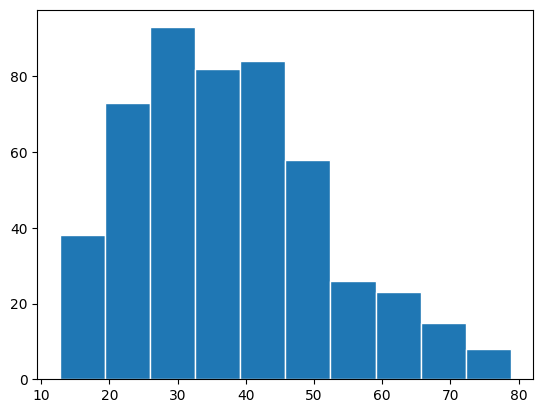

In [155]:
import matplotlib.pyplot as plt
plt.hist(df['BMI'], edgecolor='w')
plt.show()

In [168]:
# the number of the obese - that of the normal
abs(len(df[(df['BMI']>=23)&(df['BMI']<25)]) - len(df[(df['BMI']<23)&(df['BMI']>=18.5)]))

28

In [169]:
len(df[(df['BMI']>=23)&(df['BMI']<25)])

19

In [167]:
len(df[(df['BMI']<23)&(df['BMI']>=18.5)])

47

In [184]:
# Q10 student
# the number of total students of the school which shows the highest net incoming students
student = pd.read_csv('data/students.csv', encoding='cp949')
student.head()

,학교,학년,총전입학생,총전출학생,전체학생수
0,A,1,9,1,222
1,A,2,13,4,148
2,A,3,8,7,196
3,B,1,7,5,171
4,B,2,9,1,216


In [185]:
student['순전입학생'] = student['총전입학생'] - student['총전출학생']
student.head()

,학교,학년,총전입학생,총전출학생,전체학생수,순전입학생
0,A,1,9,1,222,8
1,A,2,13,4,148,9
2,A,3,8,7,196,1
3,B,1,7,5,171,2
4,B,2,9,1,216,8


In [188]:
student = student.sort_values(by='순전입학생', ascending=False).reset_index(drop=True)
student.head()

,학교,학년,총전입학생,총전출학생,전체학생수,순전입학생
0,E,1,12,3,238,9
1,A,2,13,4,148,9
2,B,2,9,1,216,8
3,A,1,9,1,222,8
4,G,2,8,2,227,6


In [190]:
student.groupby('학교')['순전입학생'].sum()

학교
A    18
B    13
C    -9
D     7
E    14
F     1
G    10
H    -1
Name: 순전입학생, dtype: int64

In [191]:
student.groupby('학교')['전체학생수'].sum()['A']

566

In [193]:
# Q11 firestation
fire = pd.read_csv('data/firestation.csv')
fire.head()

,신고일시,출동일시,출동소방서
0,2018-01-02 11:45,2018-01-02 11:50,양평소방서
1,2018-01-04 01:56,2018-01-04 02:00,수원남부소방서
2,2018-01-05 16:54,2018-01-05 16:54,김포소방서
3,2018-01-07 00:56,2018-01-07 01:01,포천소방서
4,2018-01-05 16:54,2018-01-05 16:55,고양소방서


In [194]:
fire.isna().sum()

신고일시     0
출동일시     0
출동소방서    0
dtype: int64

In [196]:
# 출동소방소별 신고일시부터 출동일시까지 연도별 연평균
import datetime as dt
fire['신고일시'] = pd.to_datetime(fire['신고일시'])
fire['출동일시'] = pd.to_datetime(fire['출동일시'])
fire['시간차'] = (fire['출동일시'] - fire['신고일시']).dt.total_seconds()
fire.head()

,신고일시,출동일시,출동소방서,시간차
0,2018-01-02 11:45:00,2018-01-02 11:50:00,양평소방서,300.0
1,2018-01-04 01:56:00,2018-01-04 02:00:00,수원남부소방서,240.0
2,2018-01-05 16:54:00,2018-01-05 16:54:00,김포소방서,0.0
3,2018-01-07 00:56:00,2018-01-07 01:01:00,포천소방서,300.0
4,2018-01-05 16:54:00,2018-01-05 16:55:00,고양소방서,60.0


In [199]:
# find average values
fire.groupby([fire['출동소방서'],fire['출동일시'].dt.year,fire['출동일시'].dt.month]).agg(mean_time=('시간차','mean'))

mean_time
출동소방서     출동일시 출동일시            
가평119안전센터 2018 1      90.000000
               2     180.000000
               4      60.000000
               5     120.000000
               6       0.000000
...                         ...
화성소방서     2018 8     144.285714
               9     157.777778
               10    141.714286
               11    169.879518
               12    116.341463

[623 rows x 1 columns]

In [207]:
## 가장 늦게 출발한 소방서의 월평균 시간을 분단위로
fire_groupped = fire.groupby([fire['출동소방서'],fire['출동일시'].dt.year,fire['출동일시'].dt.month]).agg(mean_time=('시간차','mean'))
fire_groupped.sort_values(by='mean_time', ascending=False, inplace=True)
fire_groupped

mean_time
출동소방서     출동일시 출동일시           
대화119안전센터 2018 9        3840.0
초월119안전센터 2018 7        2925.0
               6        2865.0
경기도소방재난본부 2018 8        2220.0
               10       1620.0
...                        ...
용문119안전센터 2018 2          45.0
설악119안전센터 2018 6          45.0
백암119안전센터 2018 12         40.0
영북119안전센터 2018 3           0.0
가평119안전센터 2018 6           0.0

[623 rows x 1 columns]

In [209]:
fire_groupped.iloc[0]['mean_time']/60

64.0

In [213]:
# Q12 school
school = pd.read_csv('data/elementary.csv')
school.head()

,school_name,student_1,student_2,student_3,student_4,student_5,student_6,teacher
0,서울교육대학교부설초등학교,95,95,95,104,108,110,31
1,서울대학교사범대학부설초등학교,97,100,102,102,102,104,36
2,서울개일초등학교,183,163,176,186,177,193,42
3,서울구룡초등학교,109,115,115,131,133,132,38
4,서울논현초등학교,34,47,34,46,46,46,18


In [214]:
school.isna().sum()

school_name    0
student_1      0
student_2      0
student_3      0
student_4      0
student_5      0
student_6      0
teacher        0
dtype: int64

In [215]:
# the school which shows the highest student-teacher ratio
# and print the number of teachers of that school
school['total_std'] = school['student_1'] + school['student_2'] + school['student_3'] + school['student_4'] + school['student_5'] + school['student_6']
school['ratio'] = school['total_std'] / school['teacher']
school.head()

,school_name,student_1,student_2,student_3,student_4,student_5,student_6,teacher,total_std,ratio
0,서울교육대학교부설초등학교,95,95,95,104,108,110,31,607,19.580645
1,서울대학교사범대학부설초등학교,97,100,102,102,102,104,36,607,16.861111
2,서울개일초등학교,183,163,176,186,177,193,42,1078,25.666667
3,서울구룡초등학교,109,115,115,131,133,132,38,735,19.342105
4,서울논현초등학교,34,47,34,46,46,46,18,253,14.055556


In [218]:
school.sort_values(by='ratio', ascending=False).loc[0]['teacher']

31

In [225]:
# Q13 crime
crime = pd.read_csv('data/crime.csv')
crime.head()

,년월,강력범,절도범,폭력범,지능범,풍속범,기타형사범
0,2007-01,291,2608,6494,5283,242,1126
1,2007-02,252,2403,4613,4270,158,880
2,2007-03,292,2273,6242,5110,196,1119
3,2007-04,306,2794,6813,5492,250,1311
4,2007-05,298,3469,7221,5432,192,1412


In [226]:
# 연도별 연평균 범죄건수
# create a new feature 'year'
import datetime as dt
crime['년월'] = pd.to_datetime(crime['년월'])
crime['year'] = crime['년월'].dt.year
crime.head()

,년월,강력범,절도범,폭력범,지능범,풍속범,기타형사범,year
0,2007-01-01,291,2608,6494,5283,242,1126,2007
1,2007-02-01,252,2403,4613,4270,158,880,2007
2,2007-03-01,292,2273,6242,5110,196,1119,2007
3,2007-04-01,306,2794,6813,5492,250,1311,2007
4,2007-05-01,298,3469,7221,5432,192,1412,2007


In [228]:
df = crime.copy()
df = df.drop(columns=['년월'])
pd.melt(df, id_vars=['year'])

,year,variable,value
0,2007,강력범,291
1,2007,강력범,252
2,2007,강력범,292
3,2007,강력범,306
4,2007,강력범,298
...,...,...,...
499,2013,기타형사범,1764
500,2013,기타형사범,1693
501,2013,기타형사범,2099
502,2013,기타형사범,1988


In [229]:
df = pd.melt(df, id_vars=['year'])
df.groupby('year')['value'].sum()

year
2007    178564
2008    187582
2009    210068
2010    208692
2011    223356
2012    231500
2013    231951
Name: value, dtype: int64

In [230]:
df.groupby('year')['value'].sum().sort_values(ascending=False)

year
2013    231951
2012    231500
2011    223356
2009    210068
2010    208692
2008    187582
2007    178564
Name: value, dtype: int64

In [231]:
# 가장 많이 발생한 연도 2013의 월 평균 범죄 건수를 정수로 출력
crime['month'] = crime['년월'].dt.month
crime.head()

,년월,강력범,절도범,폭력범,지능범,풍속범,기타형사범,year,month
0,2007-01-01,291,2608,6494,5283,242,1126,2007,1
1,2007-02-01,252,2403,4613,4270,158,880,2007,2
2,2007-03-01,292,2273,6242,5110,196,1119,2007,3
3,2007-04-01,306,2794,6813,5492,250,1311,2007,4
4,2007-05-01,298,3469,7221,5432,192,1412,2007,5


In [232]:
crime2013 = crime[crime['year']==2013]
crime2013 = crime2013.drop(columns=['년월']).reset_index(drop=True)
crime2013.head()

,강력범,절도범,폭력범,지능범,풍속범,기타형사범,year,month
0,396,4858,4990,6336,126,1631,2013,1
1,346,4382,4192,4900,115,1259,2013,2
2,444,4266,4936,5829,129,1495,2013,3
3,546,4915,5363,6499,125,1748,2013,4
4,558,5203,5834,7029,133,1662,2013,5


In [233]:
pd.melt(crime2013, id_vars=['year','month'])

,year,month,variable,value
0,2013,1,강력범,396
1,2013,2,강력범,346
2,2013,3,강력범,444
3,2013,4,강력범,546
4,2013,5,강력범,558
...,...,...,...,...
67,2013,8,기타형사범,1764
68,2013,9,기타형사범,1693
69,2013,1,기타형사범,2099
70,2013,11,기타형사범,1988


In [242]:
# crime2013 = pd.melt(crime2013, id_vars=['year','month'])
# crime2013 = crime2013.drop(columns=['variable']).reset_index(drop=True)
crime2013.groupby(['year','month'])['value'].mean()

year  month
2013  1        3311.583333
      2        2532.333333
      3        2849.833333
      4        3199.333333
      5        3403.166667
      6        3357.500000
      7        3672.666667
      8        3381.666667
      9        3285.000000
      11       3258.166667
      12       3095.666667
Name: value, dtype: float64

In [243]:
crime2013.groupby(['year','month'])['value'].mean().astype(int)

year  month
2013  1        3311
      2        2532
      3        2849
      4        3199
      5        3403
      6        3357
      7        3672
      8        3381
      9        3285
      11       3258
      12       3095
Name: value, dtype: int32